In [36]:
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cars_df = pd.read_csv("car data.csv")

In [3]:
cars_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
cars_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
cars_df.shape

(301, 9)

In [8]:
cars_df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [9]:
cars_df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [10]:
cars_df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [11]:
cars_df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [29]:
cars_df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [12]:
cars_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [16]:
# feature selewction
# owner describes the number of owner the car prviously had
# create a new feature called " years_diff " which will be equal to present year - year of car purchased i.e; year column

current_year = dt.date.today().year
current_year

2022

In [17]:
cars_df['years_diff'] = current_year - cars_df['Year']
cars_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_diff
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [18]:
req_columns = ['Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','years_diff']

In [20]:
final_cars_df = cars_df[req_columns]
final_cars_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_diff
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [21]:
le = LabelEncoder()

In [22]:
final_cars_df['Fuel_Type'] = le.fit_transform(final_cars_df['Fuel_Type'])
final_cars_df.head()

C:\Users\pakya\AppData\Local\Temp\ipykernel_17160\3848656287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cars_df['Fuel_Type'] = le.fit_transform(final_cars_df['Fuel_Type'])


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_diff
0,3.35,5.59,27000,2,Dealer,Manual,0,8
1,4.75,9.54,43000,1,Dealer,Manual,0,9
2,7.25,9.85,6900,2,Dealer,Manual,0,5
3,2.85,4.15,5200,2,Dealer,Manual,0,11
4,4.60,6.87,42450,1,Dealer,Manual,0,8


In [31]:
# Petrol - 2  Diesel - 1  CNG - 0

In [27]:
final_cars_df['Seller_Type'] = le.fit_transform(final_cars_df['Seller_Type'])

C:\Users\pakya\AppData\Local\Temp\ipykernel_17160\3888531467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cars_df['Seller_Type'] = le.fit_transform(final_cars_df['Seller_Type'])


In [28]:
final_cars_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_diff
0,3.35,5.59,27000,2,0,Manual,0,8
1,4.75,9.54,43000,1,0,Manual,0,9
2,7.25,9.85,6900,2,0,Manual,0,5
3,2.85,4.15,5200,2,0,Manual,0,11
4,4.60,6.87,42450,1,0,Manual,0,8


In [30]:
# Dealer - 0   Individual - 1

In [32]:
final_cars_df['Transmission'] = le.fit_transform(final_cars_df['Transmission'])

C:\Users\pakya\AppData\Local\Temp\ipykernel_17160\19843698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_cars_df['Transmission'] = le.fit_transform(final_cars_df['Transmission'])


In [33]:
final_cars_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_diff
0,3.35,5.59,27000,2,0,1,0,8
1,4.75,9.54,43000,1,0,1,0,9
2,7.25,9.85,6900,2,0,1,0,5
3,2.85,4.15,5200,2,0,1,0,11
4,4.60,6.87,42450,1,0,1,0,8


In [34]:
# Automatic - 0   Manual - 1

In [35]:
final_cars_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_diff
Selling_Price,1.000000,0.878983,0.029187,-0.509467,-0.550724,-0.367128,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,-0.440415,-0.512030,-0.348715,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,-0.166801,-0.101419,-0.162510,0.089216,0.524342
Fuel_Type,-0.509467,-0.440415,-0.166801,1.000000,0.352415,0.080466,0.055705,0.053643
Seller_Type,-0.550724,-0.512030,-0.101419,0.352415,1.000000,0.063240,0.124269,0.039896
Transmission,-0.367128,-0.348715,-0.162510,0.080466,0.063240,1.000000,-0.050316,-0.000394
Owner,-0.088344,0.008057,0.089216,0.055705,0.124269,-0.050316,1.000000,0.182104
years_diff,-0.236141,0.047584,0.524342,0.053643,0.039896,-0.000394,0.182104,1.000000


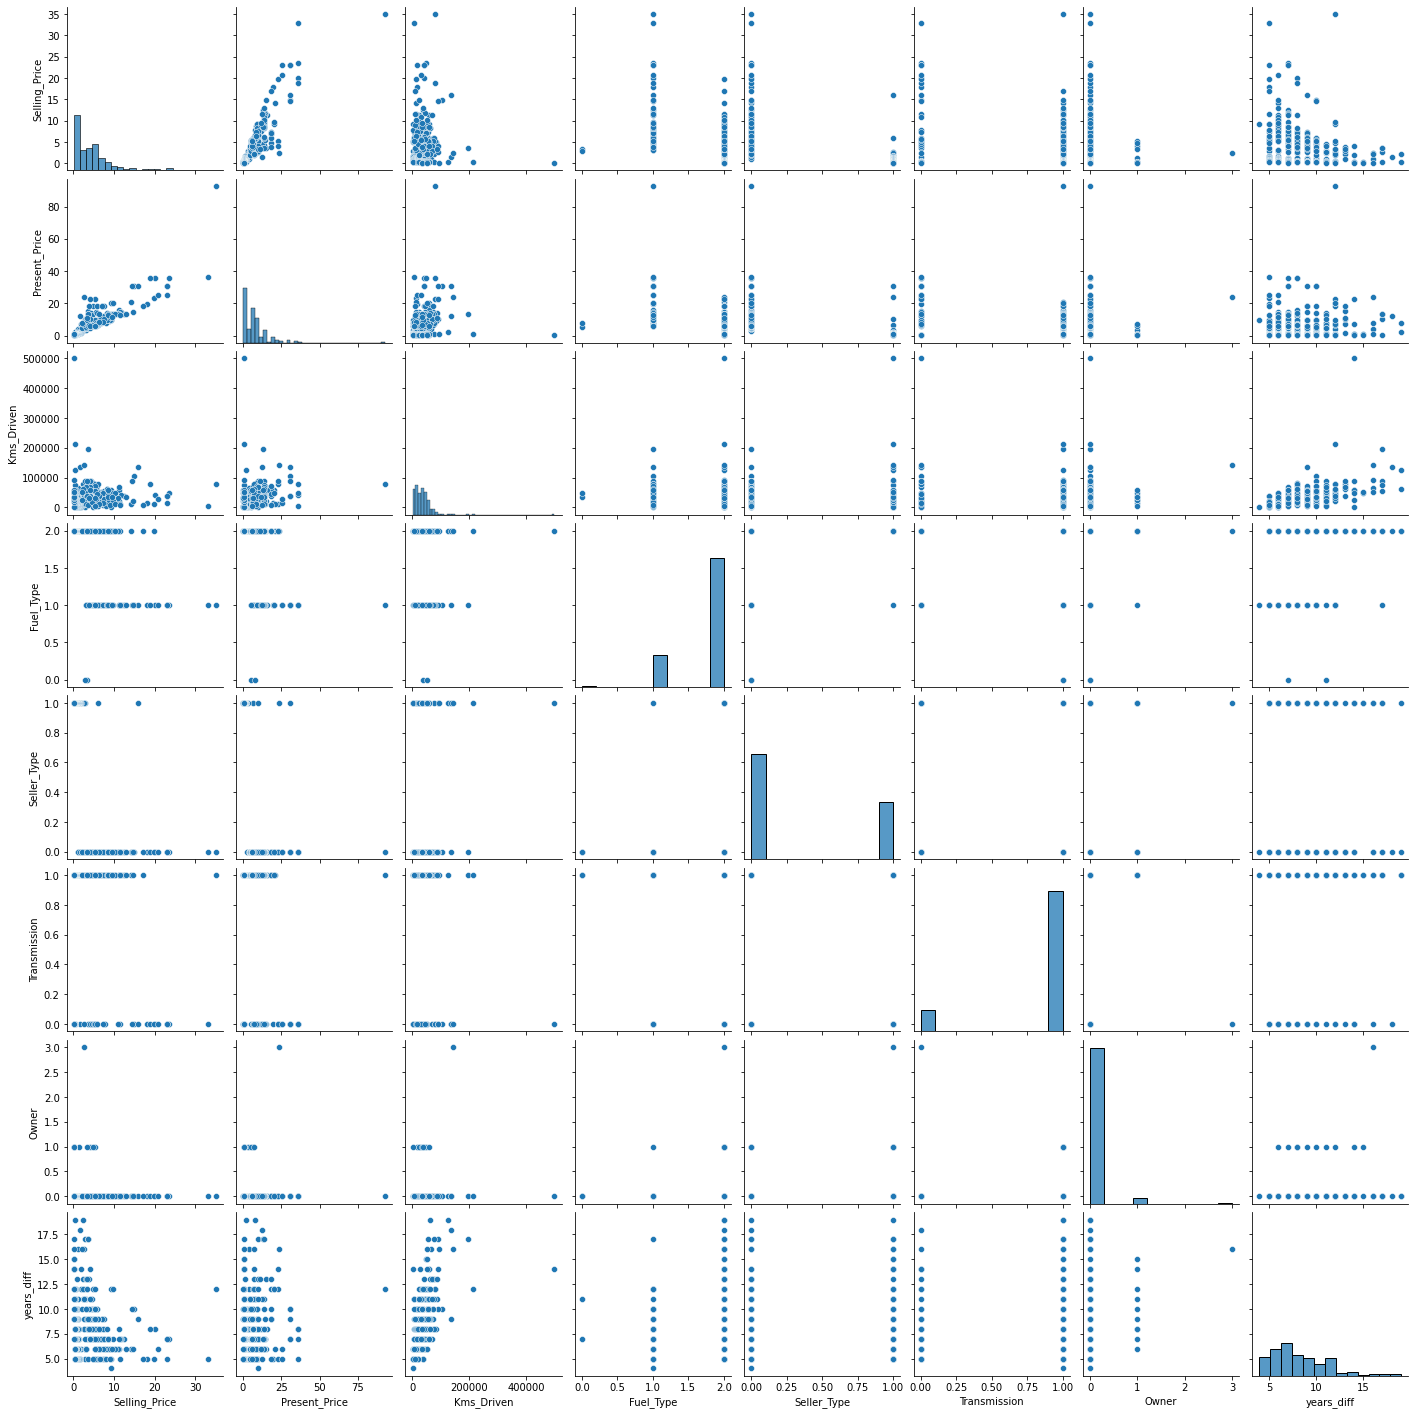

In [37]:
sns.pairplot(final_cars_df)

In [47]:
corr_mat = final_cars_df.corr()
mask_mat = np.triu(np.ones_like(corr_mat))
mask_mat

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot:>

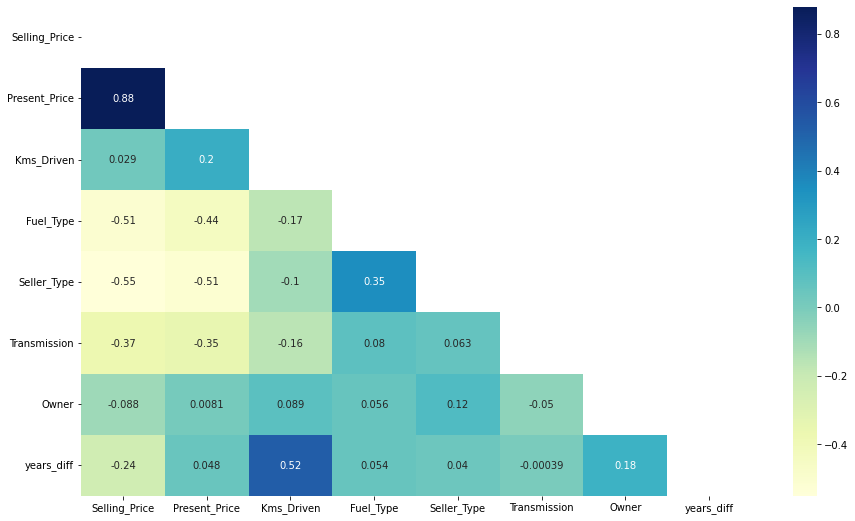

In [52]:
plt.figure(figsize=(15,9))
sns.heatmap(final_cars_df.corr(), annot=True,mask=mask_mat, cmap='YlGnBu')

In [53]:
X = final_cars_df.drop('Selling_Price',axis=1)
y = final_cars_df['Selling_Price']

In [54]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_diff
0,5.59,27000,2,0,1,0,8
1,9.54,43000,1,0,1,0,9
2,9.85,6900,2,0,1,0,5
3,4.15,5200,2,0,1,0,11
4,6.87,42450,1,0,1,0,8


In [55]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [56]:
# all the prices are in lakhs

In [58]:
# creating a model to check the feature importance of all the deatures in the dataset

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [60]:
model.feature_importances_

array([4.10295954e-01, 3.84879663e-02, 1.53992563e-01, 2.30785922e-01,
       8.81158231e-02, 2.43892296e-04, 7.80778787e-02])

<AxesSubplot:>

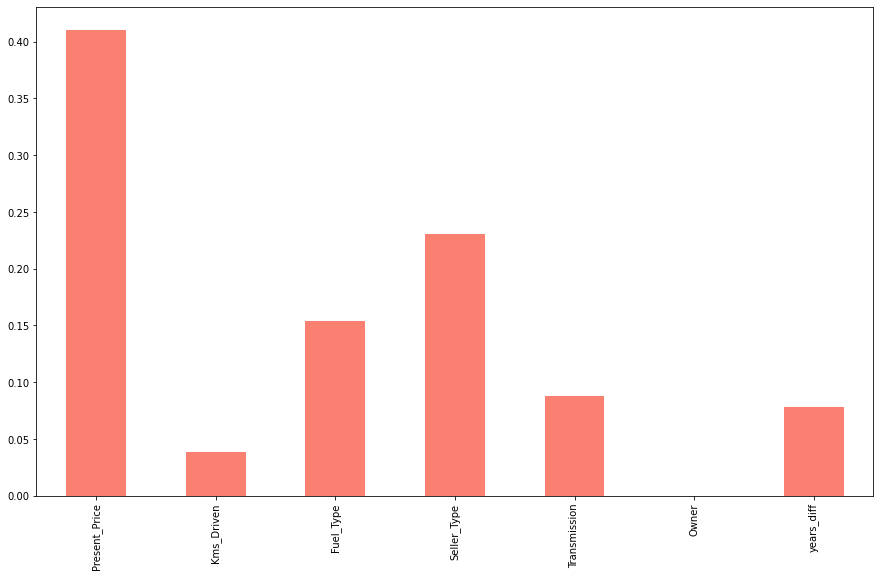

In [69]:
# just to give an idea of how different features are affecting the target variable (Selling Price)

feature_importance_series = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(15,9))
feature_importance_series.plot(kind='bar',color='salmon')

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [71]:
X_train.shape

(225, 7)

In [72]:
y_train.shape

(225,)

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rf_reg_model = RandomForestRegressor()

In [74]:
# Hyperrparameters for the above model
n_estimators = [int(x) for x in np.linspace(100, 1200, num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
random_parameters = {'n_estimators': n_estimators,
                    'max_features': max_features,
                     'max_depth': max_depth,
                     'min_samples_split': min_samples_split,
                     'min_samples_leaf': min_samples_leaf
                    }

In [78]:
feature_search = RandomizedSearchCV(estimator=rf_reg_model, param_distributions=random_parameters, scoring='neg_mean_squared_error', cv=5,verbose=True, n_iter=10, random_state= 10,n_jobs=-1)

In [79]:
feature_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=10, scoring='neg_mean_squared_error',
                   verbose=True)

In [80]:
feature_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [81]:
type(feature_search)

sklearn.model_selection._search.RandomizedSearchCV

In [96]:
X_test.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_diff
62,35.96,78000,1,0,0,0,8
0,5.59,27000,2,0,1,0,8
183,0.47,21000,2,1,1,0,9
78,22.83,80000,2,0,0,0,12
274,6.80,16500,2,0,1,0,8


In [83]:
y_test.reshape()

62     18.75
0       3.35
183     0.27
78      5.25
274     5.30
       ...  
8       8.75
150     0.50
76      5.50
154     0.50
276     8.65
Name: Selling_Price, Length: 76, dtype: float64

In [84]:
predictions = feature_search.predict(X_test)
predictions

array([18.65713586,  4.35099516,  0.46541839,  6.88673496,  4.39024924,
        6.81832342,  0.76186451,  4.14325373,  3.9772359 ,  7.50709675,
        0.75021005,  8.2927178 ,  0.3431313 ,  6.0780089 , 20.18016233,
        6.40924555,  5.11698796,  3.1833411 ,  0.79413455,  4.1001442 ,
        0.93312519,  7.58171331,  0.62746865,  0.50374593,  6.04298259,
        4.17469655,  0.33883631,  3.27648788, 11.98523759,  8.55224601,
        1.18044139,  2.59596084,  0.9283886 ,  6.185648  ,  4.46464892,
        0.59464433,  3.84330978,  5.01242262,  9.4178721 ,  8.446738  ,
        8.22530063,  0.5903206 ,  1.12506117,  4.07621454,  7.56974545,
        9.36000718,  3.90182114,  0.49534945,  0.98053581,  0.62990665,
        6.82116894,  3.00693058,  2.10710567,  0.48871233,  0.71140509,
        2.21541033,  3.07015747,  3.71245571,  4.48798134,  5.32382993,
        4.76031576,  2.86934462,  2.90520351,  5.14415367,  5.79222461,
        5.75703218,  5.86915812,  8.20418791,  0.57599445,  0.81

In [85]:
predictions.shape

(76,)

In [86]:
y_test.shape

(76,)

D:\Program Files\Softwares\apps\Anaconda\envs\demo-env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


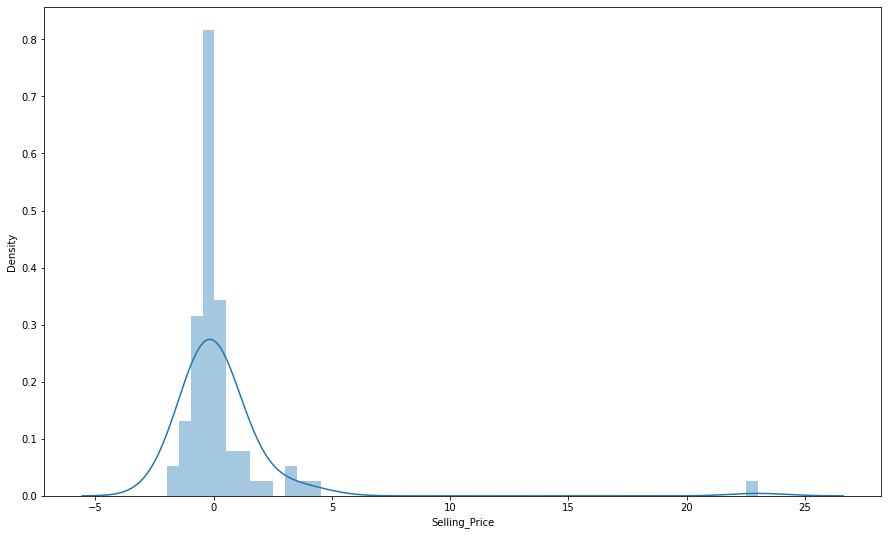

In [89]:
plt.figure(figsize=(15,9))
sns.distplot(y_test - predictions)
plt.show()

In [90]:
# clearly shows the residue distribution is normal with 0 mean

In [101]:
import pickle

file = open('car_resale_value_predictor.pkl','wb')


pickle.dump(feature_search,file)

In [97]:
feature_search.predict(np.array([15.7,65000,2,0,0,1,7]).reshape(1,-1))

D:\Program Files\Softwares\apps\Anaconda\envs\demo-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.18019238])

In [102]:
pkl_model = pickle.load(open('car_resale_value_predictor.pkl','rb'))
pkl_model.predict(np.array([15.7,65000,2,0,0,1,7]).reshape(1,-1))

D:\Program Files\Softwares\apps\Anaconda\envs\demo-env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.18019238])